# Assignment-03 First Step of Machine Learning : Model and Evaluation

机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review

### Re-code the Linear-Regression Model using scikit-learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [2]:
%matplotlib inline

In [3]:
dataset = load_boston()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
X = np.array(df['RM'])
Y = dataset.target

In [5]:
X.shape, Y.shape

((506,), (506,))

[scikit-learn linear regression document](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [6]:
reg = LinearRegression()

In [7]:
reg.fit(np.array(X).reshape(-1,1), Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
reg.coef_, reg.intercept_

(array([9.10210898]), -34.67062077643857)

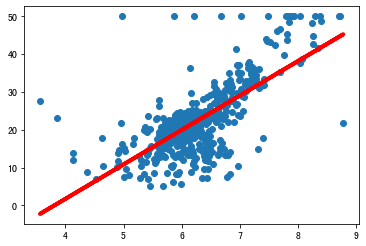

In [9]:
plt.scatter(X, Y)
plt.plot(X, reg.predict(X.reshape(-1, 1)), color='red', linewidth=4)

### Complete the unfinished KNN Moel using puring Python to solve the previous Linear-Regression problem

In [10]:
import numpy as np
import collections
from scipy.spatial.distance import cosine
from sklearn.datasets import load_iris

In [11]:
def cosine_distance(x1, x2):
    return cosine(x1, x2)

In [12]:
class KNN(object):
    """
    K Nearest Neighbors model.
    """
    def __init__(self, k=5, distance=cosine_distance):
        self._k = k
        self._distance = distance


    def fit(self, X, Y):
        self._X = X
        self._y = Y
        self.model = [(xi, yi) for xi, yi in zip(X, Y)]

    def predict(self, x):
        k = self._k
        distance = self._distance

        most_similars = sorted(self.model, key=lambda xi: distance(xi[0], x))[:k]
        counter = collections.Counter(np.array(most_similars)[:, 1])
        return counter.most_common(1)[0][0]
    

In [13]:
# load dataset

dataset = load_iris()

In [14]:
X = dataset.data[:, :2]
Y = dataset.target

In [15]:
df = pd.DataFrame(np.hstack([X, Y.reshape(-1, 1)]), columns=dataset.feature_names[:2] + ['category'])

In [16]:
df.head()

,sepal length (cm),sepal width (cm),category
0,5.1,3.5,0.0
1,4.9,3.0,0.0
2,4.7,3.2,0.0
3,4.6,3.1,0.0
4,5.0,3.6,0.0


In [17]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
setosa = df[df.category==0]
versicolor = df[df.category==1]
virginica = df[df.category==2]

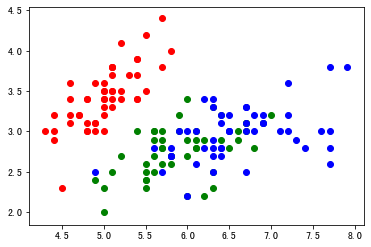

In [19]:
plt.scatter(setosa.iloc[:, 0], setosa.iloc[:, 1], color='red')
plt.scatter(versicolor.iloc[:, 0], versicolor.iloc[:, 1], color='green')
plt.scatter(virginica.iloc[:, 0], virginica.iloc[:,1], color='blue')

In [20]:
X.shape, Y.shape

((150, 2), (150,))

In [21]:
knn = KNN(5)
knn.fit(X, Y)

knn.predict(setosa.iloc[0, :2]) == setosa.iloc[0, 2]

True

In [22]:
setosa.iloc[0]

sepal length (cm)    5.1
sepal width (cm)     3.5
category             0.0
Name: 0, dtype: float64

In [23]:
knn.predict([7.5, 3])

2

### Re-code the Decision Tree, which could sort the features by salience.

**feature selection**

如何评价特征选择的好坏?

信息增益.

参考：*统计学习方法* 5.2.2 信息增益

信息熵

$$H(X) = - \sum{P(X)\log{P(x)}}$$

**信息增益算法**

输入：训练数据集D和特征A

输出：特征A对训练数据集D的信息熵的增加$g(D, A)$

1. 计算数据集D的熵$H(D)$

$$H(D)=-\sum_{k=1}^{K}\frac{|C_k|}{|D|}\log\frac{|C_k|}{|D|}$$

2. 计算特征A对数据集D的条件熵$H(D|A)$

$$H(D|A)=\sum_{i=1}^{n}\frac{|D_i|}{|D|}H(D_i) = \sum_{i=1}^{n}\frac{|D_i|}{|D|}\sum_{k=1}^{K}\frac{|D_{ik}|}{|D_i|}\log\frac{|D_{ik}|}{|D_i|}$$

3. 计算信息增益

$$g(D,A) = H(D) - H(D|A)$$

In [24]:
import collections
import numpy as np
import pandas as pd

In [25]:
def entroy(dataset:list):
    """
    entropy
    """
    N = len(dataset)
    counter = collections.Counter(dataset)
    probs= [counter[xi]/N for xi in counter]
    return -sum([p * np.log2(p) for p in probs])

In [26]:
entroy(['a', 'a', 'a'])

-0.0

In [27]:
entroy(['a', 'a', 'b', 'b', 'c'])

1.5219280948873621

In [28]:
def gain(dataset1:list, dataset2:list):
    """
    information gain
    """
    if len(dataset1) == 0 or len(dataset2) == 0:
        return 0.0

    dataset = dataset1 + dataset2
    dataset_ent = entroy(dataset)
    dataset1_ent = entroy(dataset1)
    dataset2_ent = entroy(dataset2)

    dataset1_prob = len(dataset1)/len(dataset)

    return dataset_ent - sum([dataset1_prob * dataset1_ent, (1 - dataset1_prob) * dataset2_ent])
    

In [29]:
l = ['a', 'a', 'b', 'b', 'c', 'c']

In [30]:
gain(l[:2], l[2:])

0.9182958340544893

In [31]:
gain(l[:3], l[3:])

0.6666666666666665

**mock dataset**

In [32]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [33]:
mock_dataset = pd.DataFrame(mock_data)

In [34]:
mock_dataset.head()

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0


**Build decision tree**

In [83]:
class Node(object):
    """
    Tree Node.
    """
    def __init__(self, feature=None, left=None, right=None, results=None, **kwargs):
        self.feature = feature
        self.left = left
        self.right = right
        self.results = results

In [78]:
def divide_dataset(dataset, col, val):
    """
    divide dataset based on column and value
    """
    if isinstance(val, (float, int)):
        # numerical value
        dataset1 = dataset[dataset[col] <= val]
        dataset2 = dataset[dataset[col] > val]
    else:
        # catogrical value
        dataset1 = dataset[dataset[col] == val]
        dataset2 = dataset[dataset[col] != val]

    return dataset1, dataset2

In [77]:
# split dataset by categorical feature. eg: gender:F

dataset1, dataset2 = divide_dataset(mock_dataset, 'gender', 'F')

In [38]:
dataset2.head()

,gender,income,family_number,bought
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [39]:
dataset1.head()

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0


In [40]:
# split by numerical feature. eg: family_number:1

dataset1, dataset2 = divide_dataset(mock_dataset, 'family_number', 1)

In [41]:
dataset1

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [42]:
dataset2

,gender,income,family_number,bought
2,F,+10,2,1
6,M,-10,2,1


In [92]:
def build_tree(dataset:pd.DataFrame, target:str, **kwargs):
    """
    Build decision tree.
    """
    if dataset.empty: return None

    cols = dataset.columns[:-1]
    best_gain = 0.0
    min_entropy = float(np.inf)
    org_entropy = entroy(dataset[target])
    best_feature = ()
    split_dataset = ()

    # choose feature
    for i, col in enumerate(cols):
        for val in set(dataset[col]):
            # divide dataset
            dataset1, dataset2 = divide_dataset(dataset, col, val)

            # calculate information gain
            info_gain = gain(dataset1[target].to_list(), dataset2[target].to_list())
            if info_gain > best_gain:
                best_gain = info_gain
                best_feature = (i, val)
                split_dataset = (dataset1, dataset2)

    if best_gain > 0.0: 
        left_node = build_tree(split_dataset[0], target)
        right_node = build_tree(split_dataset[1], target)
        return Node(feature=best_feature, left=left_node, right=right_node,
                    results=dataset[target].to_list())
    else:
         return Node(results=dataset[target].to_list())
    

In [93]:
decistion_tree = build_tree(mock_dataset, 'bought')

In [94]:
to_str = lambda x: map(str, x)


def traverse_tree(tree):
    if tree.feature:
        print('decision node. feature: {} results: {}'.format(':'.join(to_str(tree.feature)),
                                                               ','.join(to_str(tree.results))))
    else:
        print('leaf node. results: {}'.format(','.join(to_str(tree.results))))

    if tree.left:
        traverse_tree(tree.left)

    if tree.right:
        traverse_tree(tree.right)

In [95]:
traverse_tree(decistion_tree)

decision node. feature: 1:+10 results: 1,1,1,0,0,0,1
decision node. feature: 0:M results: 1,1,0,0,0
leaf node. results: 0,0
decision node. feature: 2:1 results: 1,1,0
leaf node. results: 1,0
leaf node. results: 1
leaf node. results: 1,1


### Finishing the K-means using 2-D matplotlib

In [47]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import collections

In [48]:
X = np.random.randint(1, 100, size=(100, 2))

In [49]:
kmeans = KMeans(n_clusters=3)

In [50]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
kmeans.cluster_centers_

array([[20.55555556, 22.66666667],
       [78.38709677, 27.25806452],
       [46.3030303 , 79.84848485]])

In [52]:
kmeans.labels_

array([2, 0, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 2, 1, 0, 2, 2, 0,
       1, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0,
       0, 0, 0, 0, 1, 2, 0, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1,
       2, 0, 1, 1, 0, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1,
       2, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0], dtype=int32)

In [53]:
cluster = collections.defaultdict(list)

for label, x in zip(kmeans.labels_, X):
    cluster[label].append(x)


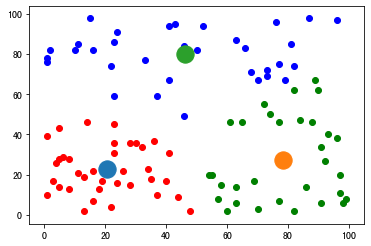

In [59]:
label_colors = ['red', 'green', 'blue']

for label, xs in cluster.items():
    for x in xs:
        plt.scatter(x[0], x[1], color=label_colors[label])

for center in kmeans.cluster_centers_:
    plt.scatter(center[0], center[1], s=300)

K-Means时间复杂度$$O(I * N * k * d)$$
>  I: 迭代次数，N: 样本数量，k: 聚类kernel数， d: 维度

## Part-2 Question and Anwser

Q: What's the model? Why all the models are wrong, but some are useful?

1. 模型是对实际问题的简化抽象，既能很好解释历史数据或现象，又能对未来的数据作出预测。机器学习模型就是从历史数据中学习到一个函数或条件概率。

2. 模型是实际问题的简化，并不能包含所有的影响因子（特征），从这个角度讲，模型可以说是错的。同时，一个好的模型包含大部分的影响因子（特征），能够作出很好的预测，从这个角度上讲，一些模型还是有用的。

Q: What's underfitting and overfitting? List the reasons that could make model overfitting and underfitting?

欠拟合：模型在训练集和测试集的表现效果都很差。

欠拟合原因：

* 模型过于简单
* 数据质量不好

过拟合：模型在训练集上的表现效果很好，在测试集上的表现效果很差。

过拟合原因：
* 模型过于复杂
* 数据分布不对
* 系数过大

Q: What's the precision, recall, AUC, F1, F2score, What are they mainly target on?

||Label Positive|Label Negative|
|-|-------------|--------------|
|Predict Positive|TP|FP|
|Predict Negative|FN|TN|


$$Precision=\frac{TP}{TP+FP}$$

$$Recall=\frac{TP}{TP+FN}$$

$$F_\beta = (1+\beta^2) \frac{Precision*Recall}{\beta^2 * Precision + Recall}$$

$$F_1=2*\frac{Precision * Recall}{Precision + Recall}$$

$$F2= 5 * \frac{Precision * Recall}{4*Precision + Recall}$$

`Precision`是预测结果中正样本的比例。

`Recall`是所有正样本中预测为正样本的比例。

`Precision`与`Recall`是互斥的，`F score`综合考虑了`Precision`和`Recall`两个指标。

以搜索引擎搜索结果为例，阐释指标之间的关系。通过调整相关性参数`relevance`控制返回结果文档的质量。`relevance`参数调整的很高，返回结果文档相关性都很高，但同时也过滤了一些相关性低的文档，`precision`很高，`recall`较低。`relevance`参数调整的很低，不仅返回相关性很高的文档，同时也返回了部分不相关的文档，`precision`较低，`recall`很高。`F score`同时考虑了`precision`和`recall`两个指标，选择合适的`relevance`参数。


AUC TODO

Q: Based on your course and yourself mind, what's the machine learning?

机器学习是从历史数据中学习一个模型，模型能够对未知的数据作出预测。同时，机器学习是一种`data-driven`编程范式，根据输入的数据决定模型内部的状态或参数，并进行响应的输出。

Q: "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？

认同。 正确的定义了模型的评价标准，我们就能够确定模型优化的目标，从而使模型的Loss降到很低，同时能够很好的预测新的数据。相反，如果错误的定义了评价的标准，即使模型在已知数据集的Loss很低，在未知的数据集的表现可能不好。

## Part-3 Programming Practice

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a completed Decision Tree Model. You show finish a predicate() function, which accepts three parameters <gender, income, family_number>, and outputs the predicated 'bought': 1 or 0.

In [96]:
import pandas as pd
import collections

In [64]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [109]:
def predict(tree, x):
    """
    预测
    """
    if tree.feature:
        col, value = tree.feature

        if isinstance(x[col], (int, float)):
            # numerical value
            if x[col] <= value:
                return predict(tree.left, x)
            else:
                return predict(tree.right, x)
        else:
            # categorical value
            if x[col] == value:
                return predict(tree.left, x)
            else:
                return predict(tree.right, x)
    else:
        counter = collections.Counter(tree.results)
        return counter.most_common()[0][0]
    

In [66]:
mock_dataset = pd.DataFrame(mock_data)

In [110]:
mock_dataset.head()

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0


In [111]:
dicision_tree = build_tree(mock_dataset, 'bought')

In [135]:
predict(dicision_tree, ['F', '+10', 1])

1

In [134]:
predict(dicision_tree, ['M', '-10', 1])

1

In [136]:
predict(dicision_tree, ['M', '-10', 3])

1

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。

**dataset**

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [172]:
boston_dataset = load_boston()

In [173]:
boston_df = pd.DataFrame(np.hstack([boston_dataset.data, boston_dataset.target.reshape(-1,1)]),
                        columns=list(boston_dataset.feature_names) + ['PRICE'])

In [174]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


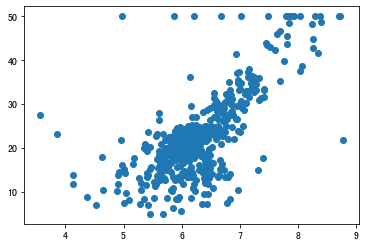

In [176]:
plt.scatter(boston_df['RM'], boston_df['PRICE'])

**Target function**

In [137]:
def price(x, k, b):
    return k * x + b

**Loss Function**

$$L = \frac{1}{n} \sum{|y_i - \hat{y_i}|} $$

In [178]:
def loss(y, y_hat):
    return sum([(yi - yi_hat) ** 2 for yi, yi_hat in zip(y, y_hat)]) / len(y)

**Optimize Function: Gradient Descent**

TODO

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)

## Reference

* [scikit-learn precision recall and f score](https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-and-f-measures)